## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [60]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [61]:
#loading and checking how the dataset looks like
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [62]:
#The number of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [63]:
#the number of unique rows base on the user_id
df.user_id.unique().shape[0]

290584

d. The proportion of users converted.

In [64]:
#The proportion os users converted using the converted column values
df[df.converted == 1].shape[0]/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [65]:
#The number of times the treatment group has an old_page as their landing page + The number of times the control group has an new_page as their landing page 
df[(df.group == 'treatment') & (df.landing_page != 'new_page')].shape[0] + df[(df.group != 'treatment') & (df.landing_page == 'new_page')].shape[0]

3893

f. Do any of the rows have missing values?

In [66]:
#Checking to see any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [67]:
#dataset df2 has all the correct rows and all the incorrect ones has been removed
df2 = df[((df.group == 'treatment') & (df.landing_page == 'new_page')) | ((df.group == 'control') & (df.landing_page == 'old_page')) ]

In [68]:
# Double Check all of the incorrect rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [69]:
#Checking how many unique users are there
df2.user_id.unique().shape[0]

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [70]:
#getting the repeated user_id
df2['user_id'].value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [71]:
#printing the repeated rows
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [72]:
#Droping one of the duplicated rows
df2.drop(index= 1899)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [73]:
#probability of a user converting
df2[df2.converted == 1].shape[0]/df2.shape[0]

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [74]:
#probability of a user converting given that he is in the control group
df2[(df2.converted == 1) & (df2.group == 'control')].shape[0]/df2[df2.group == 'control'].shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [75]:
#probability of a user converting given that he is in the treatment group
df2[(df2.converted == 1) & (df2.group == 'treatment')].shape[0]/df2[df2.group == 'treatment'].shape[0]

0.11880724790277405

d. What is the probability that an individual received the new page?

In [76]:
#probability of a user reciving the new_page
df2[df2.landing_page == 'new_page'].shape[0]/df2.shape[0]

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

Based on the results from part (a) to (d), it seems that the people in the control group are more likely to convert than the people in the treatment group. with the addition of the fact the half of the people landed on the new_page and the other half landed on the old_page.

Although that is true, the difference in the probability is not significant and i don't think it's a good evidence to support the answer of saying that the old_page has more conversions than the new_page

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

Null Hypothesis: P_old >= P_new


Alternative Hypothesis:  P_new > P_old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [77]:
#Converstion rate under the null
p_new = df2[df2.converted == 1].shape[0]/df2.shape[0]
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [78]:
#Converstion rate under the null 
p_old =df2[df2.converted == 1].shape[0]/df2.shape[0]
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [79]:
n_new = df2[df2.group == 'treatment'].shape[0]
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [80]:
n_old = df2[df2.group == 'control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [81]:
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [82]:
old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
old_page_converted

array([1, 0, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [83]:
obs_diff = new_page_converted.mean()-old_page_converted.mean()
obs_diff

-0.0025022786674367969

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [84]:
p_diffs = [] 
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   10.,    95.,   565.,  1508.,  2616.,  2750.,  1728.,   581.,
          128.,    19.]),
 array([ -4.47759294e-03,  -3.58974352e-03,  -2.70189409e-03,
         -1.81404466e-03,  -9.26195233e-04,  -3.83458050e-05,
          8.49503623e-04,   1.73735305e-03,   2.62520248e-03,
          3.51305191e-03,   4.40090133e-03]),
 <a list of 10 Patch objects>)

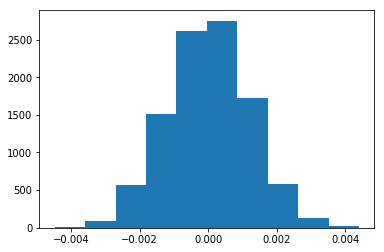

In [85]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [86]:
convert_new = df2.query('converted == 1 and landing_page == "new_page"').shape[0]
convert_old = df2.query('converted == 1 and landing_page == "old_page"').shape[0]
convert_new, convert_old

(17264, 17489)

In [87]:
actual_new = convert_new/n_new
actual_old = convert_old/n_old

In [88]:
diff = actual_new - actual_old
diff

-0.0015790565976871451

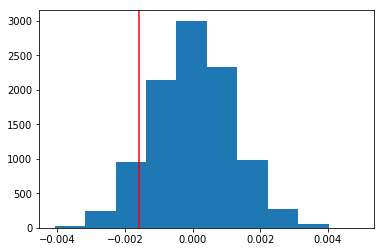

In [89]:
null_vals = np.random.normal(0, np.std(p_diffs), np.array(p_diffs).size)
plt.hist(null_vals)
plt.axvline(x=diff,color ='red');

In [90]:
(null_vals > diff).mean()

0.90580000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

What we computed in part j is known as the P-value (0.905) and since this value is greater than alpha (0.05), we fail to reject the null hypothesis.



This means that with a type I error rate of 0.05 the old page has higher probablity of convert rate than new page. Which makes the old page better than the new one.

P-Value: The probability of observing our statistic or a more extreme statistic from the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [91]:
import statsmodels.api as sm


convert_new = df2.query('converted == 1 and landing_page == "new_page"').shape[0]

convert_old = df2.query('converted == 1 and landing_page == "old_page"').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [92]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

In [93]:
z_score, p_value

(-1.3116075339133115, 0.90517370514059103)

In [94]:
from scipy.stats import norm
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

Since the z-score does not exceed the critical value of 1.9599, and also the p-value computed matches the one we computed in part j, we reject the null hypothesis. Which means that the conversion rate of the new_page is better than the new one, this matches our findings in parts j and k

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [95]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [96]:
#create a column for the intercept
df2['intercept'] = 1

#ab_page column, which is 1 when an individual receives the treatment and 0 if control.
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [98]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [99]:
#Create a logistic regression model for conveted variable and  ab_page, and use control as baseline
log = sm.OLS(df2['converted'], df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [100]:
result = log.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.720
Date:                Sun, 18 Oct 2020   Prob (F-statistic):              0.190
Time:                        18:09:54   Log-Likelihood:                -85267.
No. Observations:              290585   AIC:                         1.705e+05
Df Residuals:                  290583   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.312      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125554.337   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414318.532
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

The p-value associated with ab_page is 0.19.

The null hypothesis associated here is that there is no difference between the treatment and control group while the alternative hypotheses is that there is a difference between the treatment and control group

Part II assumes that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, so when compared from both the above sceanrios,they have different explainory varibale or factor for the result.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

We can observe if there is any difference in browsing time of each user, so that the conversion rate will vary as per the time. That can be done by observing the timestamp variable. Furthermore, we can actually convert time as categorical variable which includes "Morning, afternoon, and evening", or "weekday and weekend".

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [101]:
countries_df = pd.read_csv('countries.csv')
countries_df.head(4)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK


In [102]:
#Join ab dataset with country dataset
df3 = df2.merge(countries_df, on ='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [103]:
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])

In [106]:
df3[['new_page','old_page']] = pd.get_dummies(df3['landing_page'])

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [107]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,1


In [108]:
#Create a regression model for converted and country, and use CA and old page as baseline
model = sm.OLS(df3['converted'], df3[['intercept','new_page','UK','US']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Sun, 18 Oct 2020   Prob (F-statistic):              0.178
Time:                        18:13:51   Log-Likelihood:                -85266.
No. Observations:              290585   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1161      0.003     42.036      0.000       0.111       0.122
new_page      -0.0016      0.001     -1.308      0.191      -0.004       0.001
UK             0.0053      0.003      1.784      0.074      -0.001       0.011
US             0.0042      0.003      1.514      0.130      -0.001       0.010
==============================================================================
Omnibus:                   125552.050   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414302.956
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
#Create a new interaction variable between new page and country CA, US and UK
df3['CA_new_page'] = df3['new_page']* df3['CA']
df3['UK_new_page'] = df3['new_page']* df3['UK']
df3['US_new_page'] = df3['new_page']* df3['US']

In [110]:
df3.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,new_page,old_page,CA_new_page,UK_new_page,US_new_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0,0,0,1


In [113]:
#Create logistic regression for the intereaction variable between new page and country using dummy variable
model2 = sm.OLS(df3['converted'], df3[['intercept','new_page','UK_new_page','US_new_page','UK','US']])
result = model2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.467
Date:                Sun, 18 Oct 2020   Prob (F-statistic):              0.197
Time:                        18:15:41   Log-Likelihood:                -85264.
No. Observations:              290585   AIC:                         1.705e+05
Df Residuals:                  290579   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.1188      0.004     31.057      0.000       0.111       0.126
new_page       -0.0069      0.005     -1.277      0.202      -0.017       0.004
UK_new_page     0.0080      0.006      1.360      0.174      -0.004       0.020
US_new_page     0.0047      0.006      0.845      0.398      -0.006       0.016
UK              0.0012      0.004      0.296      0.767      -0.007       0.009
US              0.0018      0.004      0.467      0.641      -0.006       0.010
==============================================================================
Omnibus:                   125550.316   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414291.118
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



From the above Logistic Regression Results, we can see that the only intercept's p-value is less than 0.05, which is statistically significant enough for converted rate but other variables are not statistically significant.




The country a user lives is not statistically significant on the converted rate considering the page the user land in.


For every unit for new_page decreases, the user getting converted will be 7.0% more likely to happen while holding all other varibles constant.


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [114]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0